## K-Nearest Neighbours Classification

### Idea

- Inputs
    - An array $X$ of features in some N-dimensional space
    - An array $y$ of labels which tags each N dimensional observation to a class
- Outcome
    - You want to tag an unknown observation $a$ to one of the classes in your dataset
- Idea
    - To tag the observations, we look at $k$ of its nearest neighbours, and find the majority class
    - Whatever the majority label is, tag it to that majority label

### Implementation

In [46]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

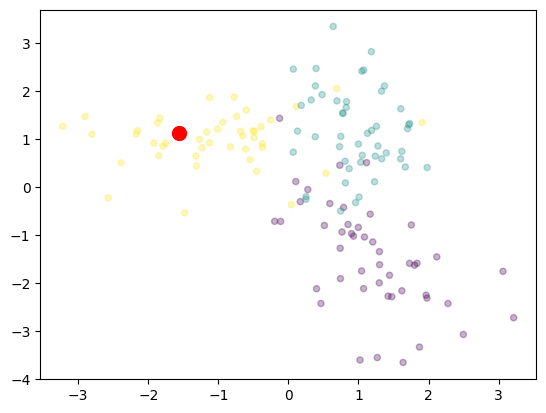

In [83]:
dim = 2
k = 20
X, y = make_classification(n_samples=200, n_features = dim, n_classes=3, n_informative=dim, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

plt.scatter(xtrain[:,0], xtrain[:, 1], c=ytrain, s=20, alpha=0.3)
plt.scatter(xtest[0,0], xtest[0,1], c='red', s=100)

In [85]:
def get_k_nearest_neighbors_classification(xtrain: np.array, new_obs: np.array, k: int) -> int:
    new_obs = new_obs
    new_obs_distances = np.linalg.norm(new_obs-xtrain, ord=2, axis=1)
    k_nearest_neighbours_index = np.argsort(new_obs_distances)[:k]
    label = Counter(ytrain[k_nearest_neighbours_index]).most_common(1)[0][0]
    print(new_obs)
    print(xtrain[k_nearest_neighbours_index][:5])

    return label

get_k_nearest_neighbors_classification(xtrain, xtest[0], k=20)

[-1.55925512  1.1343627 ]
[[-1.75326375  0.91832802]
 [-1.26736071  0.9973796 ]
 [-1.78920257  0.85418878]
 [-1.86715136  1.34119655]
 [-1.16400478  1.15045681]]


np.int64(2)

### Evaluating kNN

- The standard classification metrics apply! (Accuracy, precision, recall etc)